In [8]:
import networkx as nx
import random

import matplotlib.pyplot as plt

import itertools #package utile pour faire des analyses

import numpy as np

random.seed(1)

# THE RANDOM LIBRARY

In [10]:
random.uniform(0,1)

0.8474337369372327

In [11]:
values=[random.uniform(0,1) for i in range(1000)]

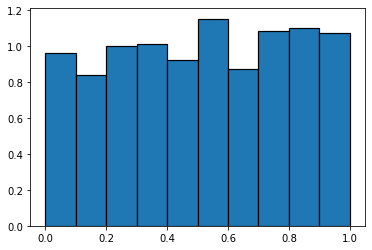

In [12]:
plt.hist(values,density=True, edgecolor='black', linewidth=1.2)
plt.show()

# THE IMPLEMENTATION OF THE ERDOS RENYI MODEL

In [15]:
# parameters
N=100 #number of nodes
p=0.01 #probability of connection

### the model loop version 1

In [16]:
# Initialization: Creation of N isolated nodes
G=nx.Graph()
nodes=[i for i in range(N)]
G.add_nodes_from(nodes)

#the cycle
for n1 in G.nodes():
    for n2 in G.nodes():
        if n1>n2:
            r=random.uniform(0,1)
            if r<p:
                G.add_edge(n1,n2)
        

In [17]:
print(G.number_of_nodes(),G.number_of_edges())

100 60


### the model loop version 2 - using itertools

In [18]:
list(itertools.combinations([1,2,3], 2) )

[(1, 2), (1, 3), (2, 3)]

Cet algorithme est plus rapide à tourner car `itertools` est une bibliothèque bien implémentée. Il vaut donc mieux l'utiliser dans des grands graphes. 

In [19]:
# Initialization: Creation of N isolated nodes
G=nx.Graph()
nodes=[i for i in range(N)]
G.add_nodes_from(nodes)
#marche aussi pour les réseaux dirigés ? là on s'intéresse au non dirigé
allEdges=list(itertools.combinations(nodes, 2)) #all possible combinations

for (u,v) in allEdges:
    r=random.uniform(0,1)
    if r<p:
        G.add_edge(u,v)

In [20]:
print(G.number_of_nodes(),G.number_of_edges())

100 58


### The model implemented in nx

A quel nombre moyen de liens je dois m'attendre pour cette génération ? Mais pour ça il faut regarder plusieurs indicateurs. 

Il faut passer par la compréhension de l'analyse d'un modèle stochastique avec une composante aléatoire comme celui-ci. 


In [21]:
G=nx.erdos_renyi_graph(N,p)

Quand il y a des générateurs qui existent dans `networkx`, il vaut mieux les utiliser car ils sont optimisés. 

In [22]:
G.number_of_edges()

48

# SEVERAL REPLICAS OF THE MODEL

To statistically study the model we need to build several replicas

In [24]:
# parameters
N=100
p=0.01

nRepl=10 #je répète mon expérience 10 fois

Syntaxe 1

In [31]:
E=[]
for i in range(nRepl):
    G=nx.erdos_renyi_graph(N,p)
    E.append(G.number_of_edges())

In [32]:
E

[45, 46, 46, 48, 45, 39, 50, 46, 43, 52]

In [33]:
np.mean(E)

46.0

Syntaxe 2

In [34]:
listGraphs=[]
for i in range(nRepl):
    G=nx.erdos_renyi_graph(N,p)
    listGraphs.append(G)
    
# or listGraphs=[nx.erdos_renyi_graph(N,p) for i in range(nReplabs)]

In [35]:
listGraphs

In [36]:
for G in listGraphs:
    print(G.number_of_edges())

62
44
52
53
48
46
48
56
53
63


In [37]:
avNLinks=[]
for G in listGraphs:
    avNLinks.append(G.number_of_edges())
    
print (np.mean(avNLinks))

52.5


# A FIRST MEASURE: the number of links as a function of N

We fix the number of nodes

In [40]:
N=1000

On fait deux cycles
1. un sur les probabilités
2. une sur les réplications

p varies between 0.0001 and 0.1

In [39]:
pList=[0.0001,0.0005,0.001,0.005,0.01,0.03,0.05,0.07,0.1]

We should do at least 100 replicas, for calculation time we do 10

In [41]:
nRepl=10

### Model setup

We build a model (with several replicas) for each value of p. For all the values of the parameter p we want to observe resulting number of edges.

La meilleure chose à faire est de générer tous les graphes et de les analyser. C'est mieux de les stocker si on veut tester plusieurs mesurer pour ne pas avoir à les refaire. 

On va donc générer 90 graphes. 

In [42]:
len(pList)*nRepl

90

In [43]:
# the list of graphs is now a dictionary: I will have a list for each value of the parameter p
listGraphs={}

#loop on the values for the parameter p
for p in pList:
    #print (p) #to be sure that I'm not too slow
    listGraphs[p]=[]
    #loop on the replicas
    for i in range(nRepl):
        G=nx.erdos_renyi_graph(N,p)
        listGraphs[p].append(G)

C'est un dictionnaire de clefs de valeurs p.

In [44]:
listGraphs

{0.0001: [<networkx.classes.graph.Graph at 0x221b2107488>,
 0.0005: [<networkx.classes.graph.Graph at 0x221b1f1f8c8>,
 0.001: [<networkx.classes.graph.Graph at 0x221b1f1f3c8>,
 0.005: [<networkx.classes.graph.Graph at 0x221ae6f66c8>,
 0.01: [<networkx.classes.graph.Graph at 0x221b1553c08>,
 0.03: [<networkx.classes.graph.Graph at 0x221b1f1fd88>,
 0.05: [<networkx.classes.graph.Graph at 0x221b1f1f188>,
 0.07: [<networkx.classes.graph.Graph at 0x221b1553a48>,
 0.1: [<networkx.classes.graph.Graph at 0x221b1f1f408>,
  <networkx.classes.graph.Graph at 0x221b1d59a48>]}

In [46]:
listGraphs[0.0001]

In [48]:
for G in listGraphs[0.0001]:
    print(G.number_of_edges())

49
53
49
42
54
55
50
46
61
35


In [49]:
for p in pList:
    for G in listGraphs[p]:
        print(G.number_of_edges())

49
53
49
42
54
55
50
46
61
35
271
255
241
261
256
280
264
270
243
212
489
475
477
511
488
515
483
510
478
488
2552
2539
2522
2483
2485
2445
2549
2533
2514
2502
4902
5078
5008
4940
5128
5058
4980
5052
5019
5098
14883
14824
15098
14987
14850
15094
15050
14910
14958
15100
24877
24900
24960
24853
25000
25240
24970
24502
24735
24844
35003
34837
34865
35074
34644
34975
34776
35504
34854
34572
49896
49803
49968
49872
50390
50144
49778
49834
49860
50094


Je veux créer une liste où j'obtiens pour chaque p la moyenne du nombre de liens sur 10 réplications. 

In [52]:
avE=[]
for p in pList:
    thisAverage=[]
    for G in listGraphs[p]:
        thisAverage.append(G.number_of_edges())
    print(p, np.mean(thisAverage))
    avE.append(np.mean(thisAverage))

0.0001 49.4
0.0005 255.3
0.001 491.4
0.005 2512.4
0.01 5026.3
0.03 14975.4
0.05 24888.1
0.07 34910.4
0.1 49963.9


In [53]:
avL=[]
for p in pList:
    listE=[G.number_of_edges() for G in listGraphs[p]]
    avL.append(np.mean(listE))

In [54]:
avL

[49.4, 255.3, 491.4, 2512.4, 5026.3, 14975.4, 24888.1, 34910.4, 49963.9]

Je trace la relation entre p et le nombre de liens. C'est linéaire. Je vais donc faire un fit pour voir les valeurs qui relient le nombre de lien avec la connexion. 

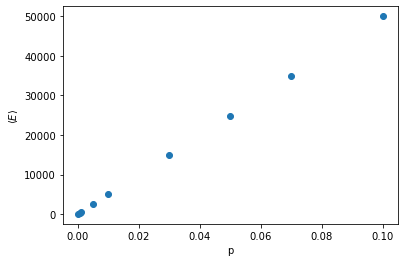

In [55]:
plt.plot(pList,avL,'o')

plt.xlabel('p')
plt.ylabel(r'$\langle E\rangle$')

plt.show()

In [57]:
coef = np.polyfit(pList,avL, 1) #1 c'est le degré : linéaire
poly1d_fn = np.poly1d(coef) 

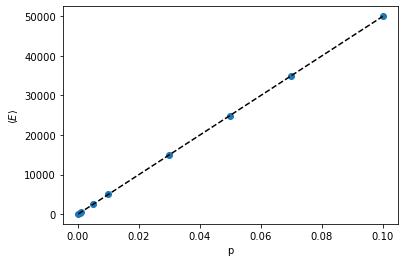

In [58]:
plt.plot(pList,avL,'o')
plt.plot(pList, poly1d_fn(pList), '--k')

plt.xlabel('p')
plt.ylabel(r'$\langle E\rangle$')

plt.show()

La relation entre p et E c'est exactement le nombre de liens possibles. 

In [59]:
coef[0]

499130.027739324

In [60]:
N*(N-1)/2

499500.0

# THE DEGREE DISTRIBUTION

Exercice individuel : faire un histogramme. 

In [ ]:
N=2000
p=0.001
nRepl=10

[k1, k2, k3, ...] [x1,x2,x3, ...] 
Je fais une seule liste
[k1, k2, k3, ... x1,x2,x3, ...] 10 x 2000 valeurs


Distribution hétérogène

No handles with labels found to put in legend.


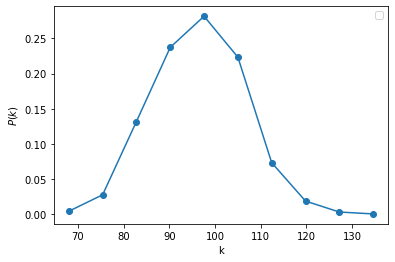

In [67]:
#loop on the values for the parameter N
graph=[]
for i in range(nRepl):
    G=nx.erdos_renyi_graph(N,p)
    graph.append(G)

# degree
degreeList=[]
for G in graph:
    degreesReplica=[G.degree(n) for n in G.nodes()] 
    degreeList=degreeList+degreesReplica
        
y,x=np.histogram(degreeList)
ynorm=[i/sum(y) for i in y]
plt.plot(x[:-1],ynorm,'o-')
plt.legend()
plt.xlabel('k')
plt.ylabel(r'$P(k)$')
plt.show()

Pour une liste de N

In [28]:
NList=[100,500,1000,2000,5000,10000]
p=0.001

nRepl=10

In [29]:
# the list of graphs is now a dictionary: I will have a list for each value of the parameter N
listGraphs={}

#loop on the values for the parameter N
for N in NList:
    print (N) 
    listGraphs[N]=[]
    #loop on the replicas
    for i in range(nRepl):
        G=nx.erdos_renyi_graph(N,p)
        listGraphs[N].append(G)

100
500
1000
2000
5000
10000


In [30]:
# degree list for all the values of N:
degreeList={}
for N in NList:
    degreeList[N]=[]
    for G in listGraphs[N]:
        degreesReplica=[G.degree(n) for n in G.nodes()] 
        degreeList[N]=degreeList[N]+degreesReplica

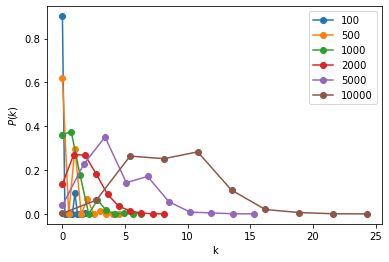

In [31]:
for N in NList:
    y,x=np.histogram(degreeList[N])
    ynorm=[i/sum(y) for i in y]
    plt.plot(x[:-1],ynorm,'o-',label=N)
plt.legend()
plt.xlabel('k')
plt.ylabel(r'$P(k)$')


plt.show()

# SMALL WORLD PROPERTIES

In [69]:
#we fix the average degree
avK=5
#This is the input list of the N values
NList=[100,300,500,800,1000,1500]

NREPL=2 
#to do a good job we should put a larger number of replicas

# the list of graphs is now a dictionary: I will have a list for each value of the parameter N
listGraphs={}

#loop on the values for the parameter N
for N in NList:
    prob=avK/N
    print (N) 
    listGraphs[N]=[]
    #loop on the replicas
    for i in range(nRepl):
        G=nx.erdos_renyi_graph(N,prob)
        listGraphs[N].append(G)

100
300
500
800
1000
1500


In [70]:
avShPath=[]
for N in NList:
    print(N)
    ll=[]
    for thisGraph in listGraphs[N]:
        if nx.is_connected(thisGraph):
            ll.append(nx.average_shortest_path_length(thisGraph))
        else:
            #extract the giant component
            Gcc = sorted(nx.connected_components(thisGraph), key=len, reverse=True)
            G0 = thisGraph.subgraph(Gcc[0])
            ll.append(nx.average_shortest_path_length(G0))
    avShPath.append(np.mean(ll))

100
300
500
800
1000
1500


KeyboardInterrupt: 

Je passe au logarithme sur l'axe x donc je trouve bien un loi logarithmique, comme ce à quoi je m'attendais. 
Ainsi les graphes d'Erdos Renyi ont bien une propriété de petit monde. 

In [ ]:
plt.plot(NList,avShPath,'o-',markersize=10)
plt.xlabel('N',size=15)
plt.ylabel('<l>',size=15)
plt.show()

#if <l>=log(N), in the semilog plane I should have a straight line 
plt.semilogx(NList,avShPath,'o-',markersize=10)
plt.xlabel('N',size=15)
plt.ylabel('<l>',size=15)
plt.show()